<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/CursPython/19_Leer_Datos_Ficheros_y_Graficar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualització de dades fitxers text i excel**

Aquest és un exemple de programa que llegueix fitxers de text o excel, per tal de visualitzar les dades. A més inclou un exemple per tractar temps i possar-les de forma correcte a l'eix c.

Començem per importar les llibreries i montar el disc del drive (drive.mount), per tal d'accedir als fitxers que volem llegir (que es troben al directori 'Colab Notebooks/data/'). S'obrirà una nova pantalla per autenticar i donar permissos per a aquest notebook, per tal que pugui llegir fitxers del drive personal a Google.

Necessiteu baixar aquests fitxers, i copiar-los al vostre drive:

[test.xlsx](https://cernbox.cern.ch/index.php/s/bXDBcVscQ00Orno)

[test2.xlsx](https://cernbox.cern.ch/index.php/s/jEjMc6C2UAtkRmL)

[test.dat](https://cernbox.cern.ch/index.php/s/OE8Ha7gjedDWm6r)



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import fromstring
from datetime import datetime
from time import strptime, strftime
from optparse import OptionParser
import sys
import re
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

directory = '/content/drive/My Drive/Colab Notebooks/data/'

Mounted at /content/drive


**a) Obrir un fitxer de text i fer una gràfica dels valors que es troben a dins**

In [2]:
input_data = pd.read_csv(directory + 'test.dat');
print(input_data)

          beta\tgamma
0                0\t1
1   0.03\t1.000450304
2   0.06\t1.001804875
3   0.09\t1.004074771
4   0.12\t1.007278705
5   0.15\t1.011443475
6   0.18\t1.016604599
7   0.21\t1.022807183
8   0.24\t1.030107054
9   0.27\t1.038572238
10   0.3\t1.048284837
11  0.33\t1.059343432
12  0.36\t1.071866157
13  0.39\t1.085994641
14  0.42\t1.101899107
15  0.45\t1.119785022
16  0.48\t1.139901881
17  0.51\t1.162554941
18  0.54\t1.188121141
19  0.57\t1.217071089
20          0.6\t1.25
21  0.63\t1.287672248
22   0.66\t1.33108717
23  0.69\t1.381579246
24  0.72\t1.440976044
25  0.75\t1.511857892
26   0.78\t1.59800693
27   0.81\t1.70523372
28  0.84\t1.843024452
29  0.87\t2.028184786
30   0.9\t2.294157339
31  0.93\t2.720647809
32  0.96\t3.571428571
33   0.99\t7.08881205


Ens fixem que no acaba de llegir bé el fitxer, perquè és un fitxer de text on les dades estan separades per un tabulador, i no una coma (,). Ho hem d'indicar:

In [3]:
input_data2 = pd.read_csv(directory + 'test.dat', sep='\t');
print(input_data2)

    beta     gamma
0   0.00  1.000000
1   0.03  1.000450
2   0.06  1.001805
3   0.09  1.004075
4   0.12  1.007279
5   0.15  1.011443
6   0.18  1.016605
7   0.21  1.022807
8   0.24  1.030107
9   0.27  1.038572
10  0.30  1.048285
11  0.33  1.059343
12  0.36  1.071866
13  0.39  1.085995
14  0.42  1.101899
15  0.45  1.119785
16  0.48  1.139902
17  0.51  1.162555
18  0.54  1.188121
19  0.57  1.217071
20  0.60  1.250000
21  0.63  1.287672
22  0.66  1.331087
23  0.69  1.381579
24  0.72  1.440976
25  0.75  1.511858
26  0.78  1.598007
27  0.81  1.705234
28  0.84  1.843024
29  0.87  2.028185
30  0.90  2.294157
31  0.93  2.720648
32  0.96  3.571429
33  0.99  7.088812


Ara si que veiem els camps ben separats. Amb pandas és molt fàcil de seleccionar, dins d'aquesta variable, les columnes que tenen una capçalera concreta:

In [4]:
print(input_data2.columns) # Així obtenim el número de columnes i noms que tenen (headers) 

x = list(input_data2[input_data2.columns[0]]) # Sería equivalent fer: x = list(input_data2['beta'])
y = list(input_data2[input_data2.columns[1]])

print(x)

Index(['beta', 'gamma'], dtype='object')
[0.0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9, 0.93, 0.96, 0.99]


Així doncs és molt fàcil ara fer la gràfica del que tenim al fitxer:

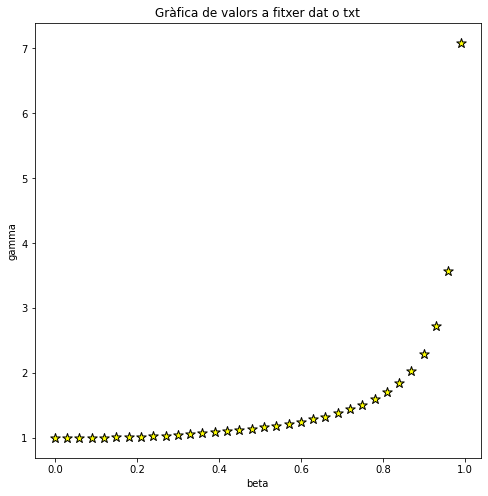

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(x,y,marker="*",s=100,edgecolors="black",c="yellow")
plt.xlabel(input_data2.columns[0])
plt.ylabel(input_data2.columns[1])
plt.title("Gràfica de valors a fitxer dat o txt")
plt.show()

**b) Obrir un fitxer de excel i fer una gràfica dels valors que es troben a dins**



In [6]:
var = pd.read_excel(directory + "test.xlsx")
print(var)

    beta     gamma
0   0.00  1.000000
1   0.03  1.000450
2   0.06  1.001805
3   0.09  1.004075
4   0.12  1.007279
5   0.15  1.011443
6   0.18  1.016605
7   0.21  1.022807
8   0.24  1.030107
9   0.27  1.038572
10  0.30  1.048285
11  0.33  1.059343
12  0.36  1.071866
13  0.39  1.085995
14  0.42  1.101899
15  0.45  1.119785
16  0.48  1.139902
17  0.51  1.162555
18  0.54  1.188121
19  0.57  1.217071
20  0.60  1.250000
21  0.63  1.287672
22  0.66  1.331087
23  0.69  1.381579
24  0.72  1.440976
25  0.75  1.511858
26  0.78  1.598007
27  0.81  1.705234
28  0.84  1.843024
29  0.87  2.028185
30  0.90  2.294157
31  0.93  2.720648
32  0.96  3.571429
33  0.99  7.088812


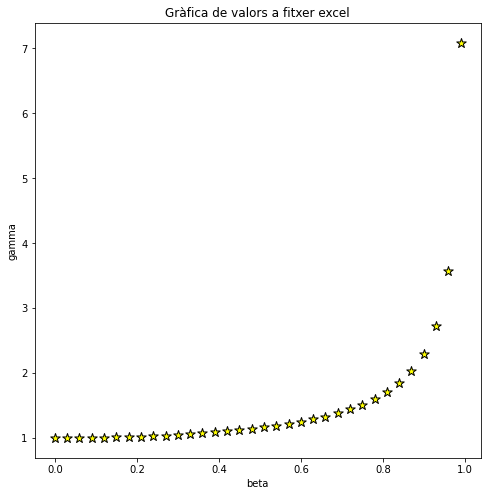

In [7]:
x = list(var['beta'])
y = list(var['gamma'])

plt.figure(figsize=(8,8))
plt.scatter(x,y,marker="*",s=100,edgecolors="black",c="yellow")
plt.xlabel(var.columns[0])
plt.ylabel(var.columns[1])
plt.title("Gràfica de valors a fitxer excel")
plt.show()

**c) Obrir un fitxer de excel i fer una gràfica dels valors que es troben a dins, on trobem dades en format DATE**

In [8]:
date_cols = ['data', 'data2']
parse_dates=date_cols
var2 = pd.read_excel(directory + "test2.xlsx", parse_dates=date_cols)
print(var2)
var2.info()

         data  alumnes                   data2    random
0  2021-01-01        1 2021-01-01 00:00:01.000  0.084913
1  2021-01-02        4 2021-01-01 00:00:02.000  0.430306
2  2021-01-03        7 2021-01-01 00:00:02.990  0.377620
3  2021-01-04       10 2021-01-01 00:00:03.985  0.988292
4  2021-01-05       13 2021-01-01 00:00:04.980  0.789797
5  2021-01-06       16 2021-01-01 00:00:05.975  0.723621
6  2021-01-07       19 2021-01-01 00:00:06.970  0.549214
7  2021-01-08       22 2021-01-01 00:00:07.965  0.571324
8  2021-01-09       25 2021-01-01 00:00:08.960  0.477461
9  2021-01-10       28 2021-01-01 00:00:09.955  0.765568
10 2021-01-11       31 2021-01-01 00:00:10.950  0.961115
11 2021-01-12       34 2021-01-01 00:00:11.945  0.800644
12 2021-01-13       37 2021-01-01 00:00:12.940  0.610002
13 2021-01-14       40 2021-01-01 00:00:13.935  0.634069
14 2021-01-15       43 2021-01-01 00:00:14.930  0.787878
15 2021-01-16       46 2021-01-01 00:00:15.925  0.518882
16 2021-01-17       49 2021-01-

Anem a fer una gràfica de les primeres dues columnes:

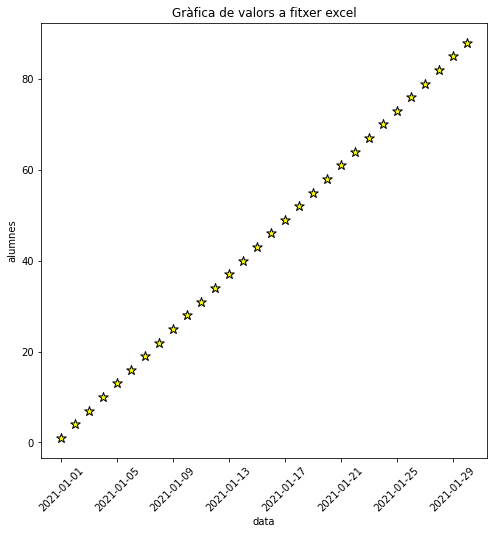

In [9]:
x = list(var2[var2.columns[0]])
y = list(var2[var2.columns[1]])

plt.figure(figsize=(8,8))
plt.scatter(x,y,marker="*",s=100,edgecolors="black",c="yellow")
plt.xlabel(var2.columns[0])
plt.ylabel(var2.columns[1])
plt.title("Gràfica de valors a fitxer excel")
plt.xticks(rotation=45)
plt.show()

Anem a fer una gràfica de les darreres dues columnes:

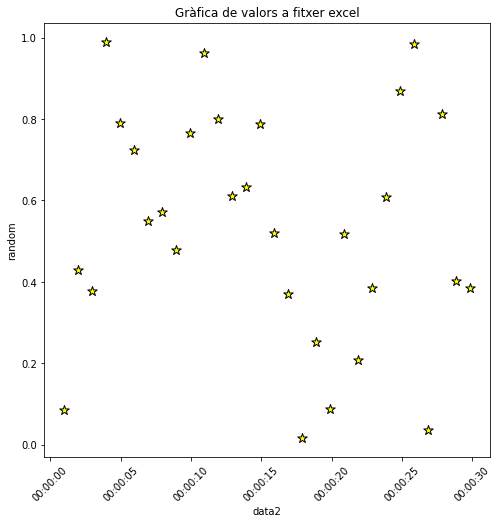

In [10]:
x = list(var2[var2.columns[2]])
y = list(var2[var2.columns[3]])

plt.figure(figsize=(8,8))
plt.scatter(x,y,marker="*",s=100,edgecolors="black",c="yellow")
plt.xlabel(var2.columns[2])
plt.ylabel(var2.columns[3])
plt.title("Gràfica de valors a fitxer excel")
plt.xticks(rotation=45)
plt.show()

Imaginem que volem posar a l'eix x el numero de segons passats, respecte a la primera mesura. Ho faríem així:

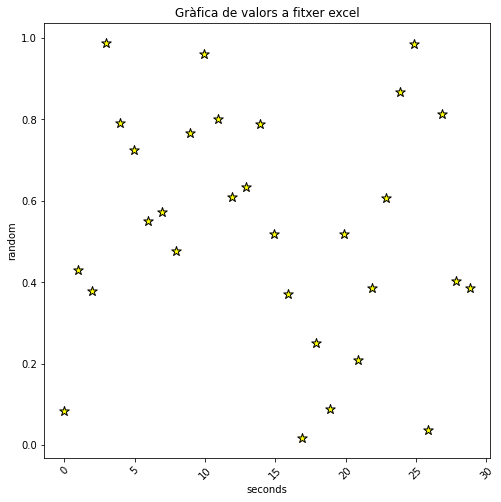

In [11]:
x = list(var2[var2.columns[2]])

interval = []
[interval.append(i.timestamp()-x[0].timestamp()) for i in x]

#print(x.timestamp()-x[0].timestamp())
#seconds = a_timedelta.total_seconds()
#pr3int(seconds)
#print(x.timestamp() - x[0].timestamp())

y = list(var2[var2.columns[3]])

plt.figure(figsize=(8,8))
plt.scatter(interval,y,marker="*",s=100,edgecolors="black",c="yellow")
plt.xlabel("seconds")
plt.ylabel(var2.columns[3])
plt.title("Gràfica de valors a fitxer excel")
plt.xticks(rotation=45)
plt.show()